In [1]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
mnist = fetch_openml('mnist_784', version=1)

c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = mnist.data.to_numpy()
X = X.reshape(-1, 28, 28)
random_seed = 27
np.random.seed(random_seed)

In [150]:
def select_random_patches(image, num_patches=3, include_null=False):
    '''Select 3 random 5x5 squares from the image. Make sure none of the selections are the same. Make sure none of the selections are empty (all black)'''
    squares = []
    indices = set()  # Set to store unique row and column pairs
    while len(indices) < num_patches:
        row = np.random.randint(0, 24)
        col = np.random.randint(0, 24)
        if (row, col) not in indices:
            square = image[row:row+5, col:col+5]
            if include_null or np.any(square):
                indices.add((row, col))
                squares.append(square.flatten())
    return np.array(squares)

In [196]:
#for all images, select 3 random 5x5 patches
all_patches = np.array([select_random_patches(image) for image in X]) 
all_patches = all_patches.reshape(-1, 25)   
all_patches = normalize(all_patches, norm='l2', axis=1, copy=False)

min_exp = 1  # Example: 2^2 = 4 clusters
max_exp = 14  # Example: 2^5 = 32 clusters
n_clusters_options = [2**i for i in range(min_exp, max_exp + 1)]
print(n_clusters_options)


[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


In [146]:
min_exp = 1  # Example: 2^2 = 4 clusters
max_exp = 10  
n_clusters_options = [2**i for i in range(min_exp, max_exp + 1)]
print(n_clusters_options)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [151]:
all_patches = np.array([select_random_patches(image, include_null=True) for image in X]) 
all_patches = all_patches.reshape(-1, 25)   
#all_patches = normalize(all_patches, norm='l2', axis=1, copy=False)


n_clusters_options = [2**i for i in range(min_exp, max_exp + 1)]
print(n_clusters_options)

# for all clusters, fit kmeans, and save the resulting kmeans object/data to a file
for n_clusters in n_clusters_options:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
    kmeans.fit(all_patches)
    filename = f'kmeans_{n_clusters}_unnormalized_wnull.joblib'
    joblib.dump(kmeans, filename)
    print('Saved ', filename)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_2_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_4_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_8_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_16_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_32_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_64_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_128_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_256_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_512_unnormalized_wnull.joblib


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saved  kmeans_1024_unnormalized_wnull.joblib


Cluster label for 2 clusters: [1]
Cluster label for 4 clusters: [3]
Cluster label for 8 clusters: [0]
Cluster label for 16 clusters: [15]
Cluster label for 32 clusters: [19]
Cluster label for 64 clusters: [7]
Cluster label for 128 clusters: [117]
Cluster label for 256 clusters: [169]
Cluster label for 512 clusters: [365]
Cluster label for 1024 clusters: [709]
Cluster label for 2048 clusters: [959]
Cluster label for 4096 clusters: [1709]
Cluster label for 8192 clusters: [6861]
Cluster label for 16384 clusters: [9647]


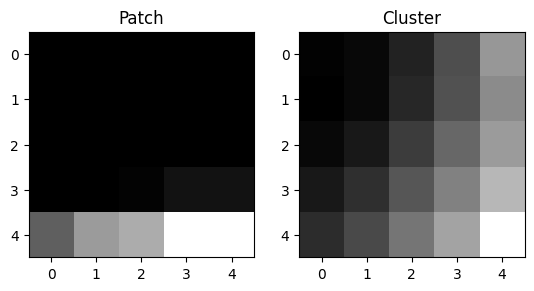

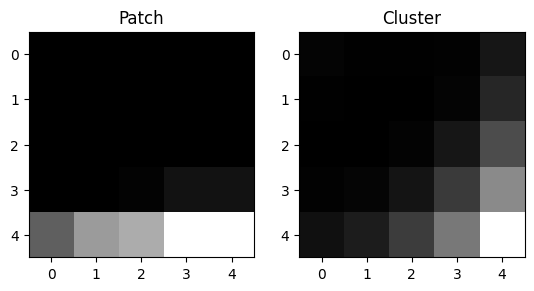

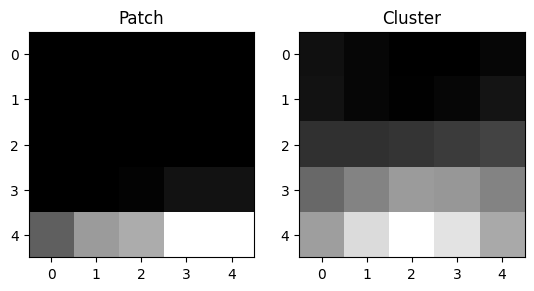

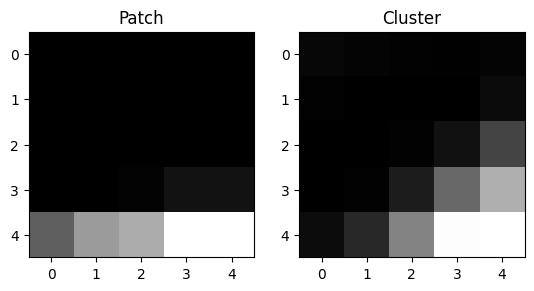

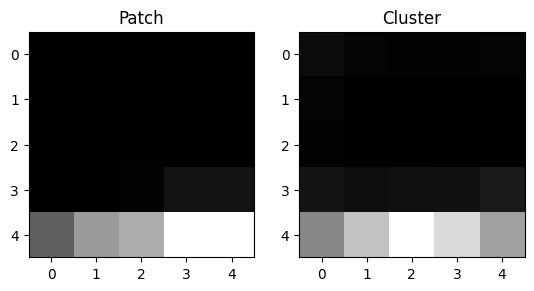

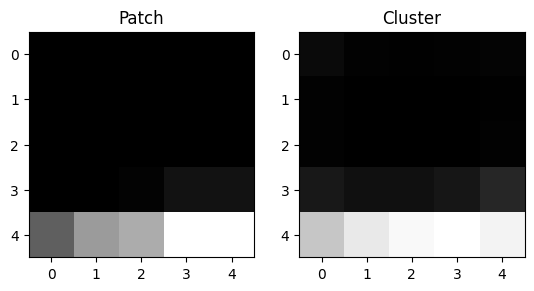

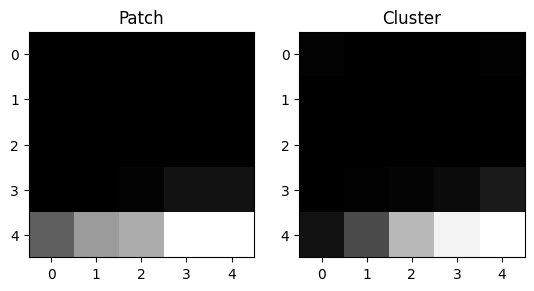

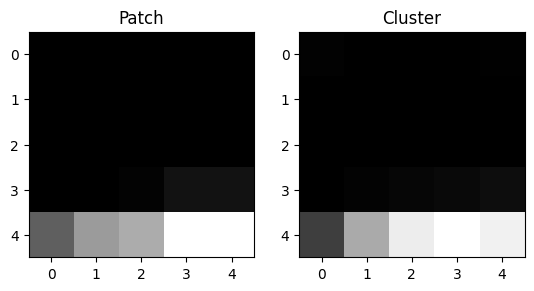

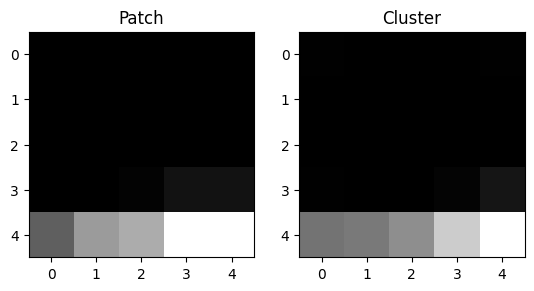

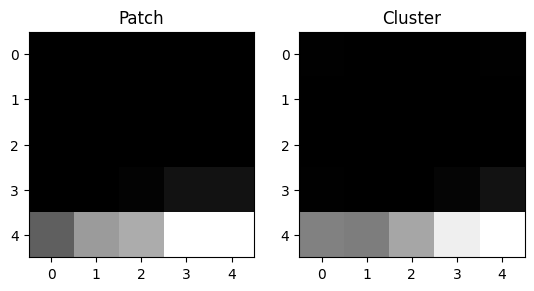

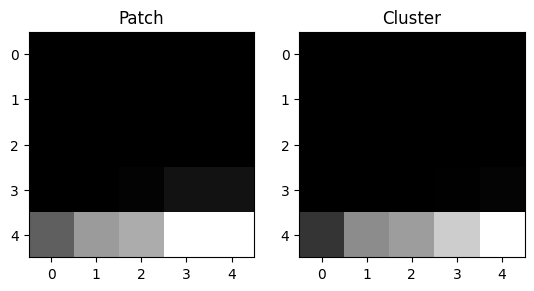

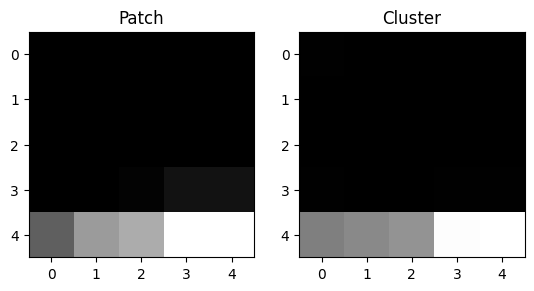

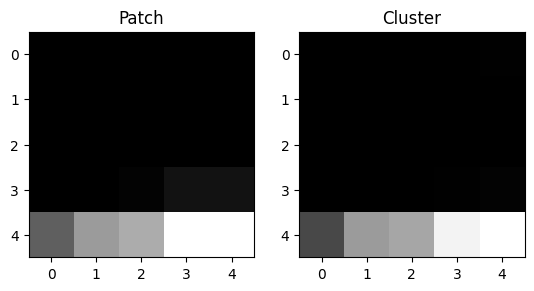

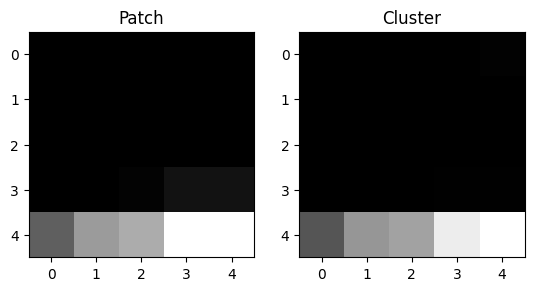

In [7]:

# for all clusters, load the kmeans object/data from a file, and predict the cluster for each patch
for n_clusters in n_clusters_options:
    patch = all_patches[2:3]
    filename = f'kmeans_{n_clusters}.joblib'
    kmeans = joblib.load(filename)
    cluster_labels = kmeans.predict(patch)
    print(f'Cluster label for {n_clusters} clusters: {cluster_labels}')
    #display the patch and cluster images
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(all_patches[:1].reshape(5, 5), cmap='gray')
    ax[0].set_title('Patch')
    ax[1].imshow(kmeans.cluster_centers_[cluster_labels].reshape(5, 5), cmap='gray')
    ax[1].set_title('Cluster')
    

In [ ]:


min_exp = 1  # Example: 2^2 = 4 clusters
max_exp = 10  
n_clusters_options = [2**i for i in range(min_exp, max_exp + 1)]
#randomly grab an image from the dataset
#and seed it with a random seed
np.random.seed(random_seed)
new_digit_image = X[np.random.randint(0, X.shape[0])]


#show the digit image
plt.imshow(new_digit_image, cmap='gray')

images_patches = break_apart_image_tight(new_digit_image)
dim_plot = len(np.arange(0, 30, 5))  

24//3
#show all image patches in one 7x7 grid
fig, ax = plt.subplots(dim_plot, dim_plot)
for i in range(dim_plot):
    for j in range(dim_plot):
        ax[i, j].imshow(images_patches[i*dim_plot + j].reshape(5, 5), cmap='gray',  aspect='auto')
        ax[i, j].axis('off')
    plt.subplots_adjust(wspace=0.001, hspace=0.001)
plt.show()

#now, for all patches, predict the cluster, then reconstruct a subplot of the predicted cluster images in a 7x7 grid
for n_clusters in n_clusters_options:
    filename = f'kmeans_{n_clusters}.joblib'
    kmeans = joblib.load(filename)
    #normalize the patches
    #if image patch is empty, set 1 value to 1 to avoid division by zero
    #make 1 array of the same size as a patch from the iamge patches, useing "like"
    zero_array = np.zeros_like(images_patches[0])
    #one_array[0] = 1
    images_patches = np.array([patch if np.any(patch) else one_array for patch in images_patches])
    #images_patches = normalize(images_patches, norm='l2', axis=1, copy=False)
    #add a cluster to the kmeans object, which is the null vector
    kmeans.cluster_centers_ = np.vstack([kmeans.cluster_centers_, zero_array])
    
    cluster_labels = kmeans.predict(images_patches)
    #display the patch and cluster images
    fig, ax = plt.subplots(dim_plot, dim_plot)
    for i in range(dim_plot):
        for j in range(dim_plot):
            ax[i, j].imshow(kmeans.cluster_centers_[cluster_labels[i*dim_plot + j]].reshape(5, 5), cmap='gray', aspect='auto')
            ax[i, j].axis('off')
    plt.subplots_adjust(wspace=0.001, hspace=0.001)
    plt.suptitle(f'Cluster images for {n_clusters} clusters')
    plt.show()

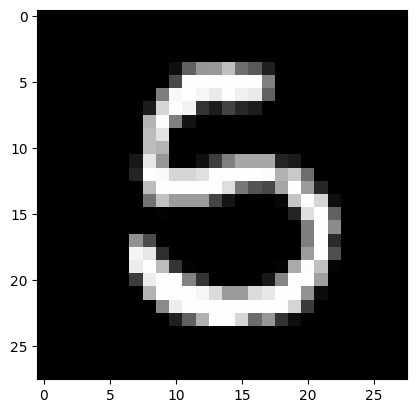

(5, 5)


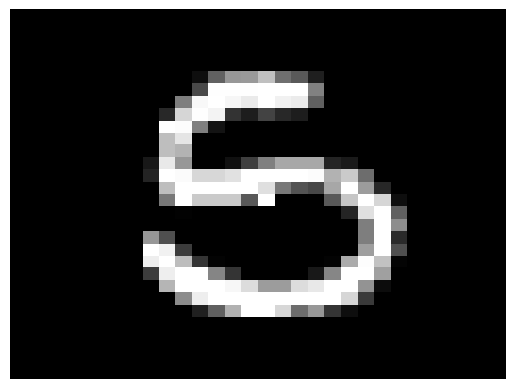

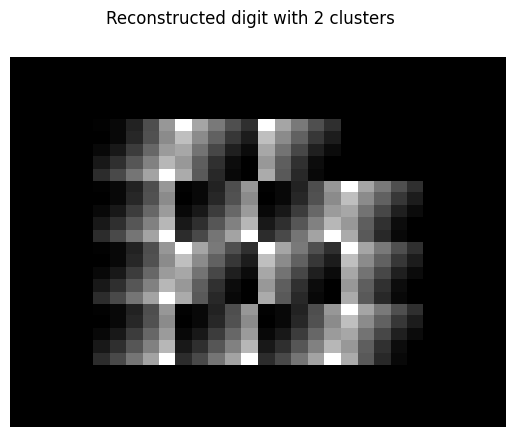

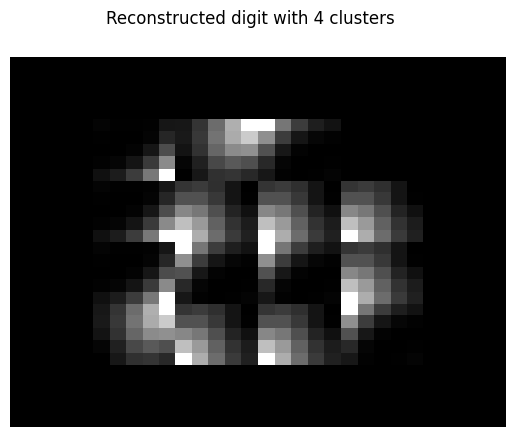

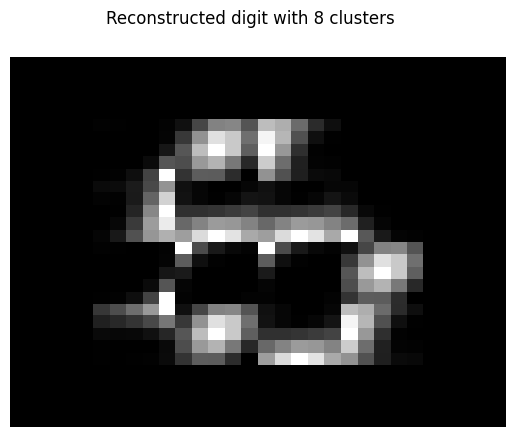

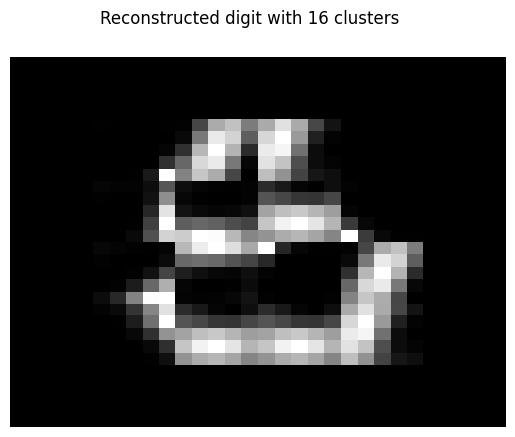

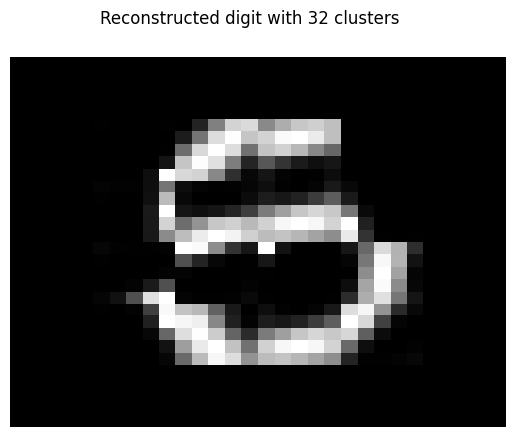

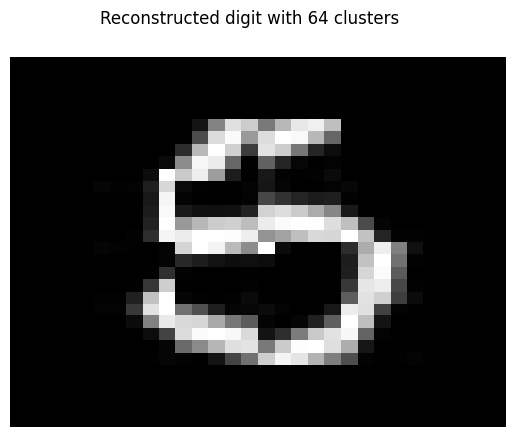

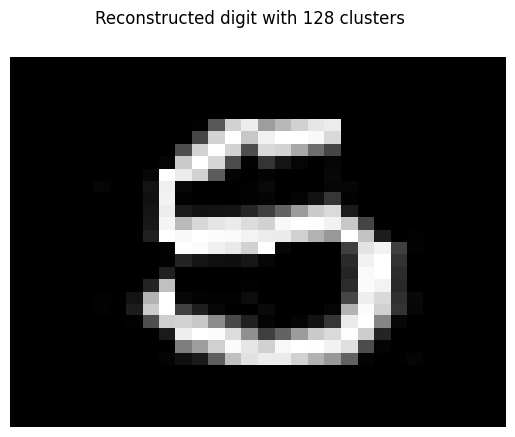

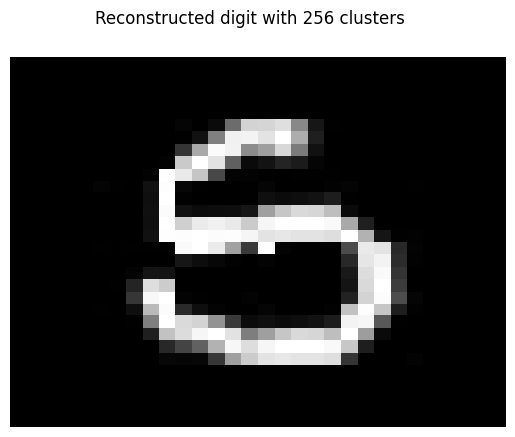

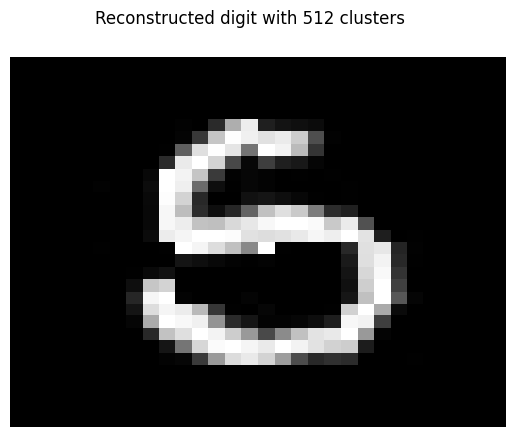

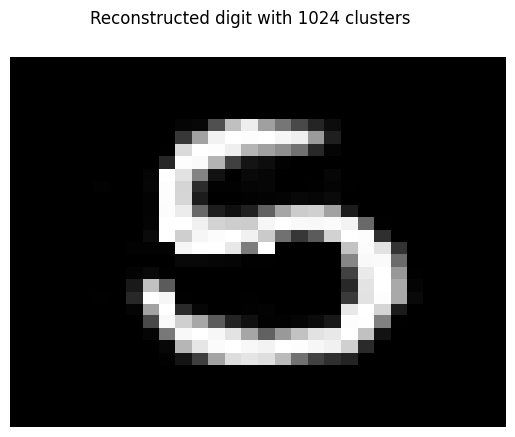

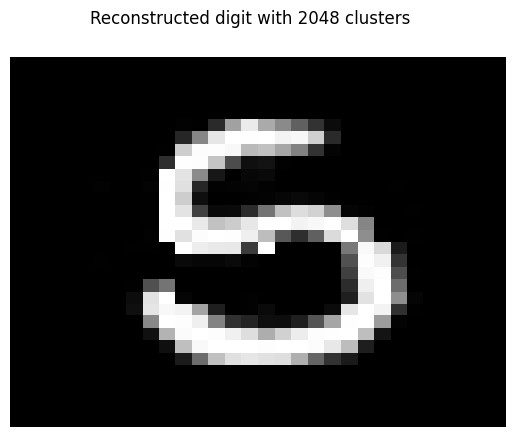

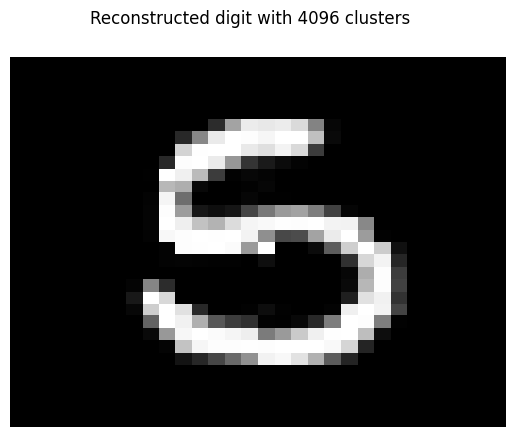

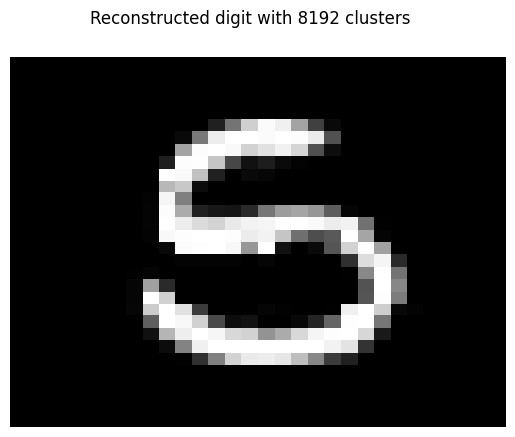

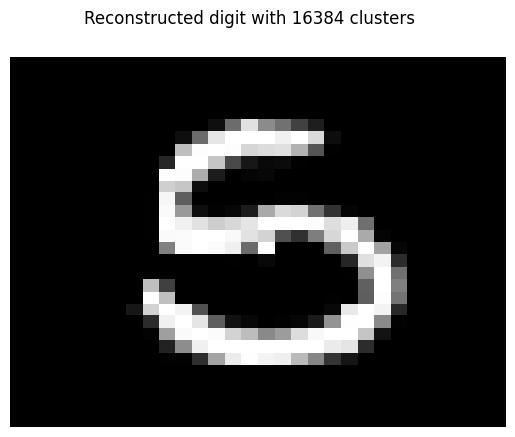

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import joblib


min_exp = 1
max_exp = 14
n_clusters_options = [2**i for i in range(min_exp, max_exp + 1)]

# Seed and select a random image from dataset
np.random.seed(random_seed*8)
new_digit_image = X[np.random.randint(0, X.shape[0])]

# Display the digit image
plt.imshow(new_digit_image, cmap='gray')
plt.show()

images_patches = break_apart_image_tight(new_digit_image)
dim_plot = len(np.arange(0, 30, 5))

# Display all image patches in one 7x7 grid
fig, ax = plt.subplots(dim_plot, dim_plot)
for i in range(dim_plot):
    for j in range(dim_plot):
        ax[i, j].imshow(images_patches[i*dim_plot + j].reshape(5, 5), cmap='gray',  aspect='auto')
        ax[i, j].axis('off')
plt.subplots_adjust(wspace=0.001, hspace=0.001)
plt.show()

# Predict clusters and reconstruct a subplot of the predicted cluster images
for n_clusters in n_clusters_options:
    filename = f'kmeans_{n_clusters}.joblib'
    kmeans = joblib.load(filename)

    zero_array = np.zeros_like(images_patches[0])
    one_array = zero_array.copy()

    images_patches = np.array([patch if np.any(patch) else one_array for patch in images_patches])

    # Normalization step might be necessary here
    kmeans.cluster_centers_ = np.vstack([kmeans.cluster_centers_, zero_array])

    cluster_labels = kmeans.predict(images_patches)

    # Display the patch and cluster images
    fig, ax = plt.subplots(dim_plot, dim_plot)
    for i in range(dim_plot):
        for j in range(dim_plot):
            ax[i, j].imshow(kmeans.cluster_centers_[cluster_labels[i*dim_plot + j]].reshape(5, 5), cmap='gray', aspect='auto')
            ax[i, j].axis('off')
    plt.subplots_adjust(wspace=0.001, hspace=0.001)
    plt.suptitle(f'Reconstructed digit with {n_clusters} clusters')
    plt.show()


0.9670267094508094 (25,) (25,)
0.0 0.31198991593811565
0.0 0.3094121704010102
0.0 0.28780034533577187
0.0 0.27162054547262277
0.0 0.21347562581720583
0.0 0.3032757587499819
0.0 0.14550144023678466
0.0 0.09045638591603754
0.0 0.2815569470658019
0.0 0.25977351392452
0.0 0.1390692219906119
0.0 0.0005880448716620718
0.0 0.0008820673074931284
0.0 0.10514442618041736
0.0 0.2714449060408032
0.0 0.09760503437304227
0.0 0.0
0.0 0.0
0.0 0.026128291744988263
0.0 0.21014131281478704
0.0 0.2689519892590134
0.0 0.10125288841917324
0.0 0.021061489559498728
0.0 0.0
0.0 0.17413753826682563


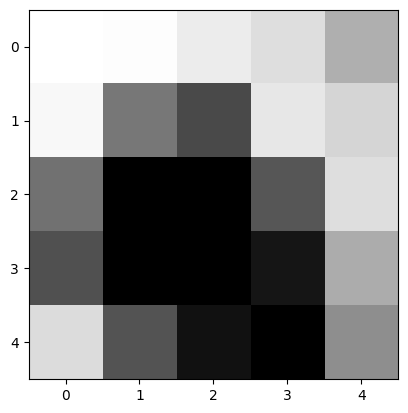

In [127]:

testimage = images_patches[:1]
indx = kmeans.predict(testimage)
null_centroid = kmeans.cluster_centers_[indx].flatten()
#null_centroid = kmeans.cluster_centers_[1000].flatten() 
plt.imshow(null_centroid.reshape(5,5), cmap='gray')
#find l2 distance between the patch and the null centroid
l2_distance = np.linalg.norm(testimage.flatten() - null_centroid)
print(l2_distance, testimage.flatten().shape, null_centroid.shape)
for x,y in zip(testimage.flatten(),null_centroid):
    print(x,y)  


In [183]:
def break_apart_image(image):
    '''Select 3 random 5x5 squares from the image. Make sure none of the selections are the same. Make sure none of the selections are empty (all black)'''
    squares = []
    rows = cols = np.arange(0, 24, 3)
    for row in rows:
        for col in cols:
            square = image[row:row+5, col:col+5]
            squares.append(square.flatten())
    print(square.shape)
    return np.array(squares)

def break_apart_image_tight(image):
    '''Select 3 random 5x5 squares from the image. Make sure none of the selections are the same. Make sure none of the selections are empty (all black)'''
    squares = []
    rows = cols = np.arange(0, 30, 5)
    #add two more 0 rows and columns to the image. Make it the border of the image.
    image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
    for row in rows:
        for col in cols:
            square = image[row:row+5, col:col+5]
            squares.append(square.flatten())
    print(square.shape)
    return np.array(squares)

In [135]:
n_clusters_options = [2**i for i in range(1, 15)]
print(n_clusters_options)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
(64, 1)


0.11141604392753751


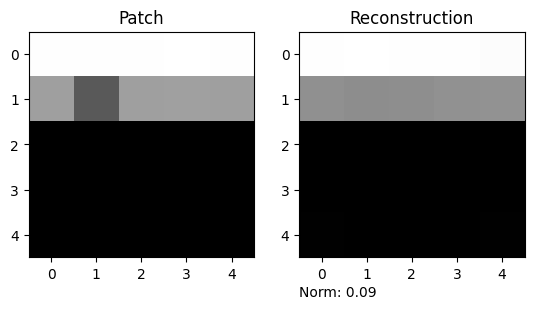

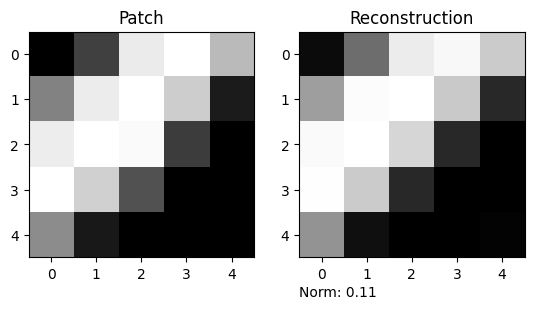

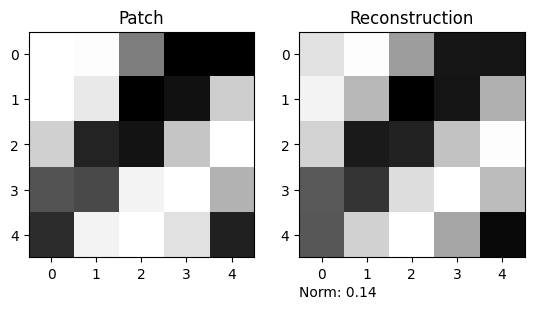

In [129]:
random_indices = np.random.choice(all_patches.shape[0], 1000, replace=False)
#randomly select 1000 patches from the dataset
random_patches = all_patches[random_indices]

#Use KNN to place each patch into a cluster, then find the average distance of each patch to the centroid of its cluster
cluster_distances = []
for patch in random_patches:
    cluster = kmeans.predict(patch.reshape(1, -1))
    centroid = kmeans.cluster_centers_[cluster]
    distance = np.linalg.norm(patch - centroid)
    cluster_distances.append(distance) 
#average distance of each patch to the centroid of its cluster
avg_distance = np.mean(cluster_distances)
print(avg_distance)

#dispaly the patch, and the centroid of the cluster it belongs to
for patch in random_patches[:3]:
    cluster = kmeans.predict(patch.reshape(1, -1))
    centroid = kmeans.cluster_centers_[cluster]
    
    norm = np.linalg.norm(centroid - patch)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(patch.reshape(5, 5), cmap='gray')
    plt.title('Patch')
    plt.subplot(1, 2, 2)
    plt.imshow(centroid.reshape(5, 5), cmap='gray')
    plt.title('Reconstruction')
    plt.annotate(f'Norm: {norm:.2f}', (0, 0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.show()


In [ ]:
# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.show()


In [74]:
min_exp = 1  # Example: 2^2 = 4 clusters
max_exp = 14  # Example: 2^5 = 32 clusters
n_clusters_options = [2**i for i in range(min_exp, max_exp + 1)]
errors = []

print(n_clusters_options)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\paral\.conda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\paral\.cond

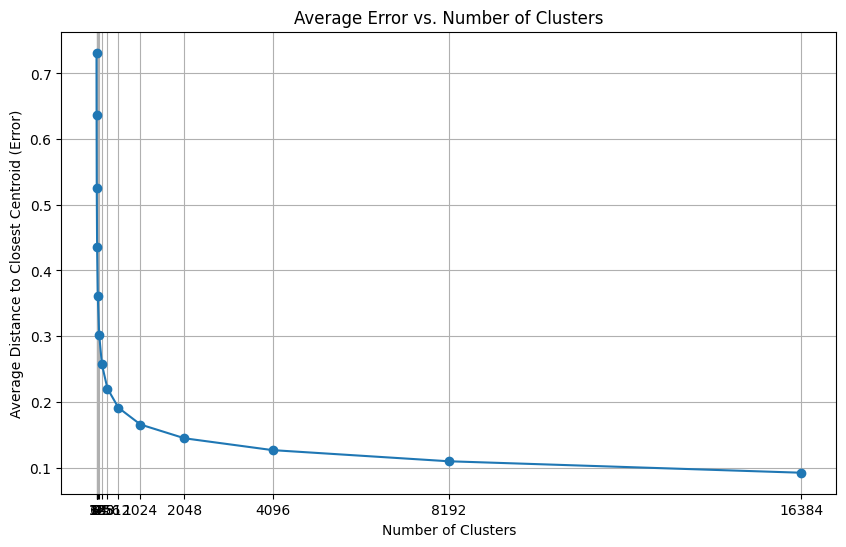

In [75]:

# Iterate over each number of clusters
for n_clusters in n_clusters_options:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
    kmeans.fit(all_patches)

    # Calculate the distances of all patches to their respective centroids
    cluster_assignments = kmeans.predict(all_patches)
    centroids = kmeans.cluster_centers_[cluster_assignments]
    distances = np.linalg.norm(all_patches - centroids, axis=1)

    # Calculate and record the average distance
    avg_distance = np.mean(distances)
    errors.append(avg_distance)

# Plotting the graph of errors vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_options, errors, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance to Closest Centroid (Error)')
plt.title('Average Error vs. Number of Clusters')
#plt.xscale('log', basex=2)  # Setting x-axis to logarithmic scale
plt.xticks(n_clusters_options, labels=n_clusters_options)  # Ensure ticks match cluster counts
plt.grid(True)
plt.show()

In [84]:
#write this to a file
#kmeans.cluster_centers_.shape
np.save('centroids.npy', kmeans.cluster_centers_)
print(errors)

[0.7315388457033531, 0.636295643186875, 0.5256810724591567, 0.43531215612981566, 0.3608480661534881, 0.3022697510757787, 0.25683872909603883, 0.22029021456938977, 0.19097093691732264, 0.165456554938882, 0.14448355937493518, 0.1264594714304056, 0.10949653206046459, 0.09205551346806502]


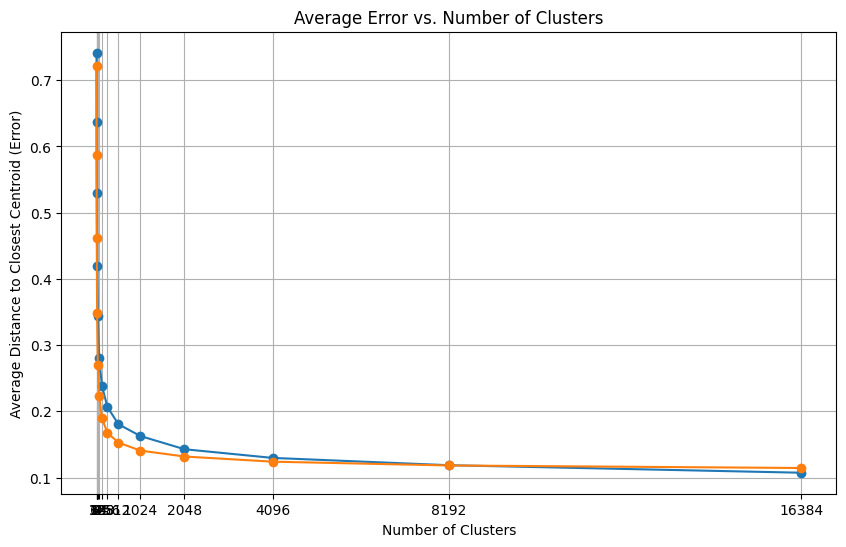

In [215]:
def get_sparse_codes(patch, kmeans, sparsity_param):
    coder = SparseCoder(dictionary=kmeans.cluster_centers_, transform_algorithm='lasso_lars', transform_alpha=sparsity_param)
    sparse_codes = coder.transform(patch)
    return sparse_codes

#modify the above code, but read the kmeans object from the joblib file
errors = []
sparse_errors = []
#get a random subset of the pathces
subset_indices = np.random.choice(all_patches.shape[0], 100, replace=False)
subset_patches = all_patches[random_indices]

# Iterate over each number of clusters
for n_clusters in n_clusters_options:
    # Load the KMeans model
    filename = f'kmeans_{n_clusters}.joblib'
    kmeans = joblib.load(filename)

    # Calculate the distances of all patches to their respective centroids using SPARSE CODING
    cluster_distances = []
    for patch in subset_patches:
        sparse_codes = get_sparse_codes(patch.reshape(1, -1), kmeans, 0.1)
        centroid = np.dot(sparse_codes, kmeans.cluster_centers_)
        distance = np.linalg.norm(patch - centroid)```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````
        cluster_distances.append(distance)

    # Calculate and record the average distance
    avg_distance = np.mean(cluster_distances)
    sparse_errors.append(avg_distance)

    cluster_assignments = kmeans.predict(subset_patches)
    centroids = kmeans.cluster_centers_[cluster_assignments]
    distances = np.linalg.norm(subset_patches - centroids, axis=1)

    # Calculate and record the average distance
    avg_distance = np.mean(distances)
    errors.append(avg_distance)



    # # Calculate the sparse representation of the patches
    # #norm_patches = normalize(all_patches, norm='l2', axis=1, copy=False)    
    # # Calculate the distances of all patches to their respective centroids
    # cluster_assignments = kmeans.predict(all_patches)
    # #normalize the patches
    # centroids = kmeans.cluster_centers_[cluster_assignments]
    # distances = np.linalg.norm(all_patches - centroids, axis=1)

    # Calculate and record the average distance
    #avg_distance = np.mean(distances)
    #errors.append(avg_distance)

# Plotting the graph of errors vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_options, errors, marker='o')
plt.plot(n_clusters_options, sparse_errors, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance to Closest Centroid (Error)')
plt.title('Average Error vs. Number of Clusters')
#plt.xscale('log', basex=2)  # Setting x-axis to logarithmic scale
plt.xticks(n_clusters_options, labels=n_clusters_options)  # Ensure ticks match cluster counts
plt.grid(True)
plt.show()

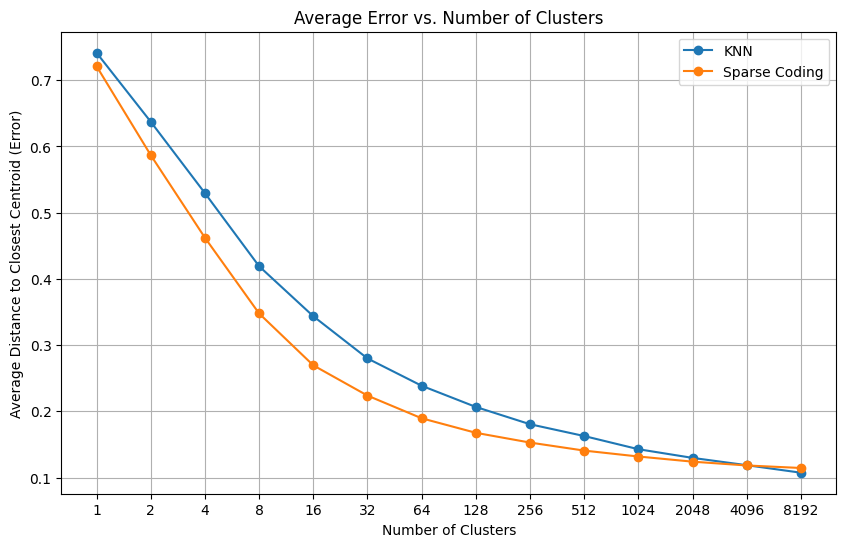

In [221]:
reduced_clusters = [i for i in range(14)]
labels_exp = [2**i for i in range(14)]
reduced_errors = errors[:8] 
plt.figure(figsize=(10, 6))
plt.plot(reduced_clusters, errors, marker='o')
plt.plot(reduced_clusters, sparse_errors, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance to Closest Centroid (Error)')
plt.title('Average Error vs. Number of Clusters')
#plt.xscale('log', basex=2)  # Setting x-axis to logarithmic scale
plt.xticks(reduced_clusters, labels=labels_exp)  # Ensure ticks match cluster counts``````````````````
#add legend
plt.legend(['KNN', 'Sparse Coding'])
plt.grid(True)
plt.show()

In [213]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
kmeans.fit(x_all_patches)

x_cluster_assignments = kmeans.predict(x_all_patches)
x_centroids = kmeans.cluster_centers_[x_cluster_assignments]
x_distances = np.linalg.norm(x_all_patches - x_centroids, axis=1)

# Calculate and record the average distance
x_avg_distance = np.mean(x_distances)
print(x_avg_distance)


NameError: name 'x_all_patches' is not defined

In [95]:
test = select_random_patches(X[0], num_patches=10)

In [134]:
from sklearn.cluster import KMeans
from sklearn.decomposition import SparseCoder


In [204]:
from sklearn.decomposition import SparseCoder

#write a function that returns the sparse codes for a given sinlge image
def get_sparse_codes(patch, kmeans, sparsity_param):
    coder = SparseCoder(dictionary=kmeans.cluster_centers_, transform_algorithm='lasso_lars', transform_alpha=sparsity_param)
    sparse_codes = coder.transform(patch)
    return sparse_codes


In [203]:
sparse_codes.shape

(6, 16384)

5
0.9355276884641247


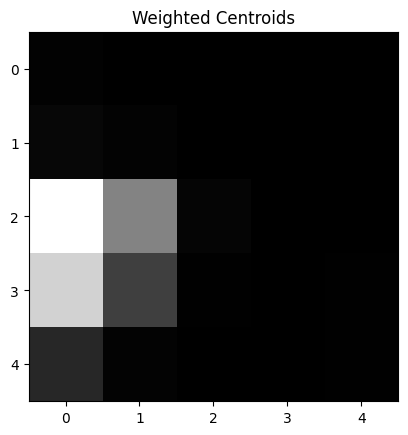

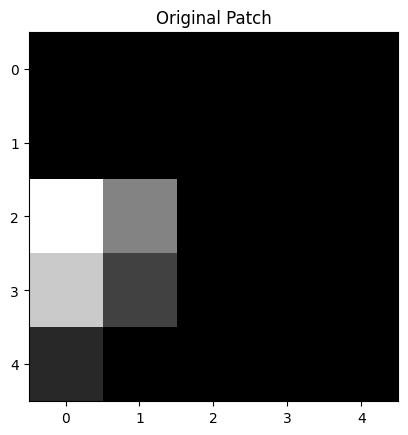

0.11110115735331892


In [167]:
#count number of non-zero elements in codes
non_zero = np.count_nonzero(sparse_codes)
print(non_zero)
#sum of all the non-zero elements
sum_non_zero = np.sum(sparse_codes)
print(sum_non_zero)

#using the sparse codes as cluster weights, multiply the cluster centers by the weights and sum them up, then display the result
weighted_centroids = np.dot(sparse_codes, dictionary)
weighted_centroids = np.sum(weighted_centroids, axis=0)
plt.figure()
plt.imshow(weighted_centroids.reshape(5, 5), cmap='gray')
plt.title('Weighted Centroids')
plt.show()

#display the original patches
for patch in subset_patches:
    plt.figure()
    plt.imshow(patch.reshape(5, 5), cmap='gray')
    plt.title('Original Patch')
    plt.show()

#calculate the reconstruction error
reconstruction_error = np.linalg.norm(subset_patches - weighted_centroids)
print(reconstruction_error)
